In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_data_dir = 'horse-or-human/train/'
validation_data_dir = 'horse-or-human/validation/'
num_classes = 2 

In [4]:
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(64, activation="relu"),
    Dense(num_classes, activation="softmax")
])

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20, 
    width_shift_range=0.2,
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

Epoch 1/10


2023-06-01 19:14:17.720529: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


32/32 [==============================] - ETA: 0s - loss: 0.6131 - accuracy: 0.6482

2023-06-01 19:14:27.779177: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


32/32 [==============================] - 11s 350ms/step - loss: 0.6131 - accuracy: 0.6482 - val_loss: 0.6636 - val_accuracy: 0.6094
Epoch 2/10
32/32 [==============================] - 11s 331ms/step - loss: 0.5182 - accuracy: 0.7417 - val_loss: 1.3887 - val_accuracy: 0.5859
Epoch 3/10
32/32 [==============================] - 11s 327ms/step - loss: 0.4243 - accuracy: 0.7960 - val_loss: 0.8333 - val_accuracy: 0.6992
Epoch 4/10
32/32 [==============================] - 13s 399ms/step - loss: 0.3723 - accuracy: 0.8201 - val_loss: 0.7115 - val_accuracy: 0.7383
Epoch 5/10
32/32 [==============================] - 12s 387ms/step - loss: 0.3131 - accuracy: 0.8523 - val_loss: 1.4142 - val_accuracy: 0.6797
Epoch 6/10
32/32 [==============================] - 13s 405ms/step - loss: 0.3094 - accuracy: 0.8673 - val_loss: 1.5580 - val_accuracy: 0.6172
Epoch 7/10
32/32 [==============================] - 14s 442ms/step - loss: 0.2353 - accuracy: 0.8995 - val_loss: 2.0774 - val_accuracy: 0.5742
Epoch 8/10

In [9]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.613134,0.648241,0.663613,0.609375
1,0.518167,0.741709,1.388666,0.585938
2,0.424263,0.795980,0.833292,0.699219
3,0.372346,0.820100,0.711474,0.738281
4,0.313135,0.852261,1.414156,0.679688


In [10]:
model.save("horse-or-human.h5")

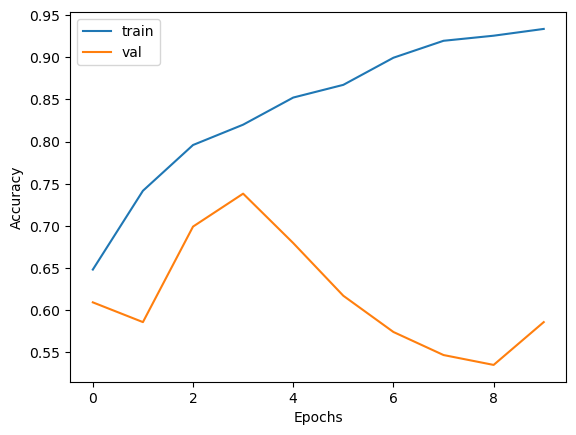

In [11]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "val"])
plt.show()

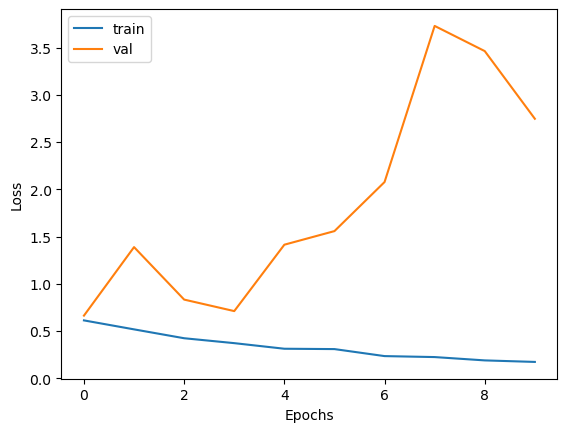

In [12]:
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train", "val"])
plt.show()

In [13]:
test_loss, test_acc = model.evaluate(validation_generator)
print('Test accuracy:', test_acc)

1/8 [==>...........................] - ETA: 1s - loss: 1.9775 - accuracy: 0.6562

2023-06-01 19:16:47.052843: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


8/8 [==============================] - 1s 123ms/step - loss: 2.7468 - accuracy: 0.5859
Test accuracy: 0.5859375
